In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [95]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
print train.shape
print test.shape

(42000, 785)
(28000, 784)


In [97]:
train_images = (train.ix[:, 1:].values).astype('float32')
train_labels = train.ix[:, 0].values.astype('int32')

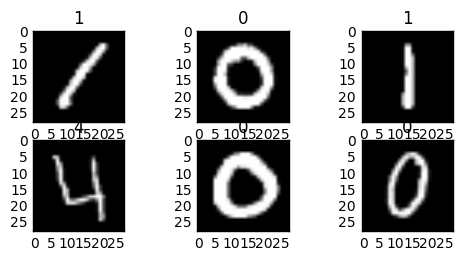

In [98]:
train_plot = train_images.reshape(train_images.shape[0],  28, 28)

for i in range(0, 6):
    plt.subplot(330 + (i+1))
    plt.imshow(train_plot[i], cmap = plt.get_cmap('gray'))
    plt.title(train_labels[i])

In [99]:
print train_images.shape
print test.shape
print test_ids.shape

(42000L, 784L)
(28000, 784)
(28000, 784)


In [100]:
rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(train_images, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
result = rand_forest.predict(test)

In [102]:
result = pd.DataFrame(result)
result.head()

,0
0,2
1,0
2,9
3,9
4,3


In [104]:
result.index.names = ['ImageId']
result.head()

,0
ImageId,
0,2
1,0
2,9
3,9
4,3


In [103]:
result.to_csv('submission.csv', sep = ',', index = True)